In [ ]:
from time import time
import tensorflow as tf
import numpy as np

from tensorflow import keras
from tensorflow.keras import datasets, layers, models, losses
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

#reshape for CNN (batch, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#normalization
X_train.astype(float)
X_test.astype(float)
X_train, X_test = X_train / 255.0, X_test / 255.0

print(X_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)


In [ ]:
model = keras.models.Sequential()

Conv1 = keras.layers.Conv2D(56, 3, activation="relu", input_shape=(28,28,1))
MaxPool1 = keras.layers.MaxPooling2D(2)
Conv2 = keras.layers.Conv2D(56, 3, activation="relu")
MaxPool2 = keras.layers.MaxPooling2D(2)
Conv3 = keras.layers.Conv2D(56, 3, activation="relu")

model.add(Conv1)
model.add(MaxPool1)
model.add(Conv2)
model.add(MaxPool2)
model.add(Conv3)
flat_layer = keras.layers.Flatten()
dense_layer2 = keras.layers.Dense(56, activation="relu")
dense_layer3 = keras.layers.Dense(10, activation="softmax")
model.add(flat_layer)
model.add(dense_layer2)
model.add(dense_layer3)
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 56)        560       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 56)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        28280     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 56)          28280     
_________________________________________________________________
flatten (Flatten)            (None, 504)               0         
_________________________________________________________________
dense (Dense)                (None, 56)                2

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1580 - accuracy: 0.9517 - val_loss: 0.0496 - val_accuracy: 0.9845
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0482 - accuracy: 0.9850 - val_loss: 0.0336 - val_accuracy: 0.9901
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0352 - accuracy: 0.9886 - val_loss: 0.0323 - val_accuracy: 0.9899
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0269 - accuracy: 0.9917 - val_loss: 0.0291 - val_accuracy: 0.9913
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0222 - accuracy: 0.9931 - val_loss: 0.0402 - val_accuracy: 0.9903


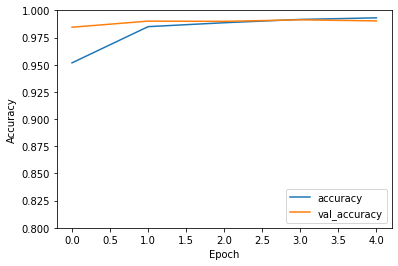

In [ ]:
history = model.fit(X_train,  Y_train, epochs=5, validation_data=(X_test, Y_test))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch') 
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
from keras_preprocessing import image
images = image.load_img("mmm.png", target_size=(28, 28))    
x = image.img_to_array(images)
plt.imshow(x)
x = tf.image.rgb_to_grayscale(x)
x = np.expand_dims(x, axis=0)
x = x/255.0
model_outpout = model.predict(x)
max = 0
for i in range(len(model_outpout[0])):
  if model_outpout[0,i] >= model_outpout[0,max]:
    max = i
#print(model_outpout)
print(x.shape)
print("Le modèle prédit que le chiffre sur l'image est un ", max, "avec une probabilité de ", str(model_outpout[0, max]*100)[:5], "%")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


L [21, 34, 48, 55, 70, 79, 93, 103, 116, 126, 142, 150, 165, 173, 188, 198, 212, 221, 235, 241, 255, 262, 264, 277]
Le modèle prédit la valeur de  012345678910
liste des probas:  [100.0, 99.8, 99.7, 99.9, 99.9, 99.6, 99.9, 98.4, 79.5, 99.8, 99.8, 100.0]


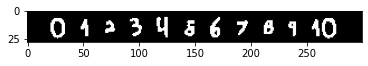

In [ ]:
from keras_preprocessing import image
images = image.load_img("number.png")    
x = image.img_to_array(images)
plt.imshow(x)
x = tf.image.rgb_to_grayscale(x)
x = np.expand_dims(x, axis=0)
x = x/255.0

ind = 0
L = []
for x_coord in range(x.shape[2]):
    if ind%2 == 0:
        if (x[0,:,x_coord,0] > 0.5).any():
            L.append(x_coord)
            ind+=1
    else:
        if False not in (x[0,:,x_coord,0] < 0.1):
            L.append(x_coord)
            ind+=1

Images = []
print("L", L)
for i in range(0, len(L), 2):
  cote = (28 - (L[i+1]-L[i]))//2
  if cote < 0:
    cote = 28
  img = np.zeros([1,28,28,1])
  for k in range(L[i+1]-L[i]+2):
    try:
      img[0,:,k+cote, 0] = x[0,:,k+L[i], 0]
    except:
      print(k)
  Images.append(img)

result = ""
probas = []
for image in Images:
  model_outpout = model.predict(image)
  maximum = 0
  for i in range(len(model_outpout[0])):
    if model_outpout[0,i] >= model_outpout[0,max]:
      maximum = i
  result += str(maximum)
  probas.append(float(str((model_outpout[0, maximum])*100)[:4]))
print("Le modèle prédit la valeur de ", result)
print("liste des probas: ", probas)
#plt.imshow(Images[6][0,:,:,0])